About Dataset
Problem Statement
Happy Customer Bank is a mid-sized private bank that deals in all kinds of banking products, like Savings accounts, Current accounts, investment products, credit products, among other offerings.

The bank also cross-sells products to its existing customers and to do so they use different kinds of communication like tele-calling, e-mails, recommendations on net banking, mobile banking, etc.

In this case, the Happy Customer Bank wants to cross sell its credit cards to its existing customers. The bank has identified a set of customers that are eligible for taking these credit cards.

Now, the bank is looking for your help in identifying customers that could show higher intent towards a recommended credit card, given:

Customer details (gender, age, region etc.)
Details of his/her relationship with the bank (ChannelCode,Vintage, 'AvgAsset_Value etc.)

Data Dictionary
Variable || Definition

ID || Unique Identifier for a row

Gender || Gender of the Customer

Age || Age of the Customer (in Years)

Region_Code || Code of the Region for the customers

Occupation || Occupation Type for the customer

Channel_Code || Acquisition Channel Code for the Customer (Encoded)

Vintage || Vintage for the Customer (In Months)

Credit_Product || If the Customer has any active credit product (Home loan, Personal loan, Credit Card etc.)

AvgAccountBalance || Average Account Balance for the Customer in last 12 Months

Is_Active || If the Customer is Active in last 3 Months

Is_Lead(Target) || If the Customer is interested for the Credit Card

0 : Customer is not interested

1 : Customer is interested

Evaluation
The evaluation metric for this competition is rocaucscore across all entries in the test set.

Public and Private Split
Test data is further divided into Public 30% and Private 70%

Your initial responses will be checked and scored on the Public data.
The final rankings would be based on your private score which will be published once the competition is over.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

# Load Data

In [2]:
train= pd.read_csv(r'C:\Users\Admin\Desktop\Projects_\Credit Card Lead Prediction\train_s3TEQDk.csv')
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [3]:
test= pd.read_csv(r'C:\Users\Admin\Desktop\Projects_\Credit Card Lead Prediction\test_mSzZ8RL.csv')
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [4]:
print(train.shape)
print(test.shape)

(245725, 11)
(105312, 10)


In [5]:
train.isna().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [6]:
test.isna().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [7]:
#percentage of null values
(train['Credit_Product'].isna().sum()/train['Credit_Product'].count())

0.13551293900184844

In [8]:
(test['Credit_Product'].isna().sum()/test['Credit_Product'].count())

0.13494988684125445

In [9]:
train.drop('ID', axis=1, inplace=True)
test.drop('ID', axis=1, inplace=True)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Gender               245725 non-null  object
 1   Age                  245725 non-null  int64 
 2   Region_Code          245725 non-null  object
 3   Occupation           245725 non-null  object
 4   Channel_Code         245725 non-null  object
 5   Vintage              245725 non-null  int64 
 6   Credit_Product       216400 non-null  object
 7   Avg_Account_Balance  245725 non-null  int64 
 8   Is_Active            245725 non-null  object
 9   Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 18.7+ MB


**Divinding columns into categorical and numerical for easier EDA**

In [11]:
cat_cols= [col for col in train.columns if train[col].dtype=='object']
num_cols= [col for col in train.columns if train[col].dtype!='object']
num_cols.remove('Is_Lead')
print(cat_cols)
print(num_cols)

['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active']
['Age', 'Vintage', 'Avg_Account_Balance']


# Exploratory Data Analysis

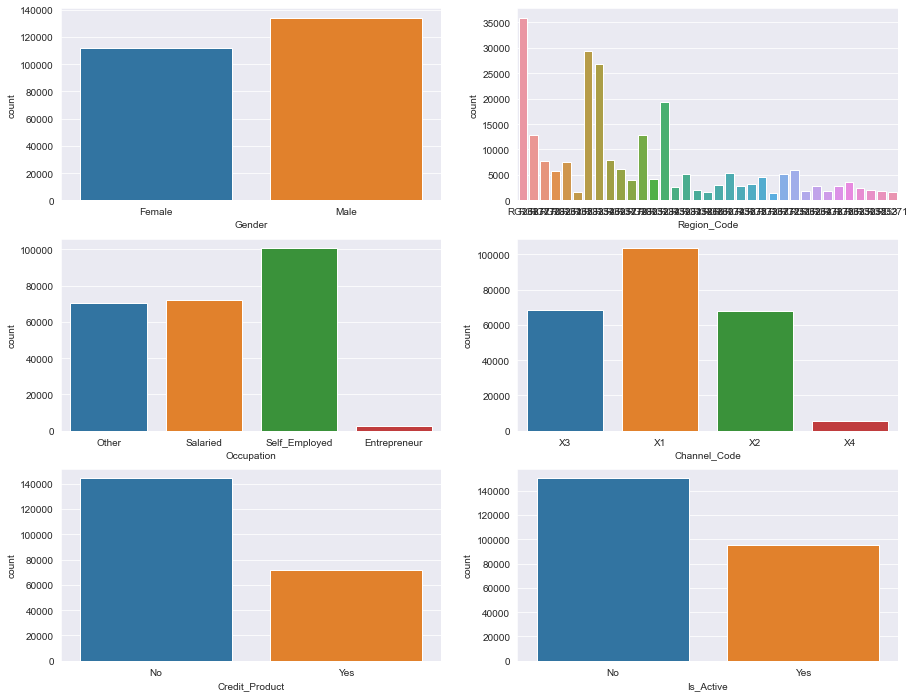

In [12]:
plt.figure(figsize=(15,12))
i=1
for col in cat_cols:
    plt.subplot(3,2,i)
    sns.countplot(train[col])
    i+=1

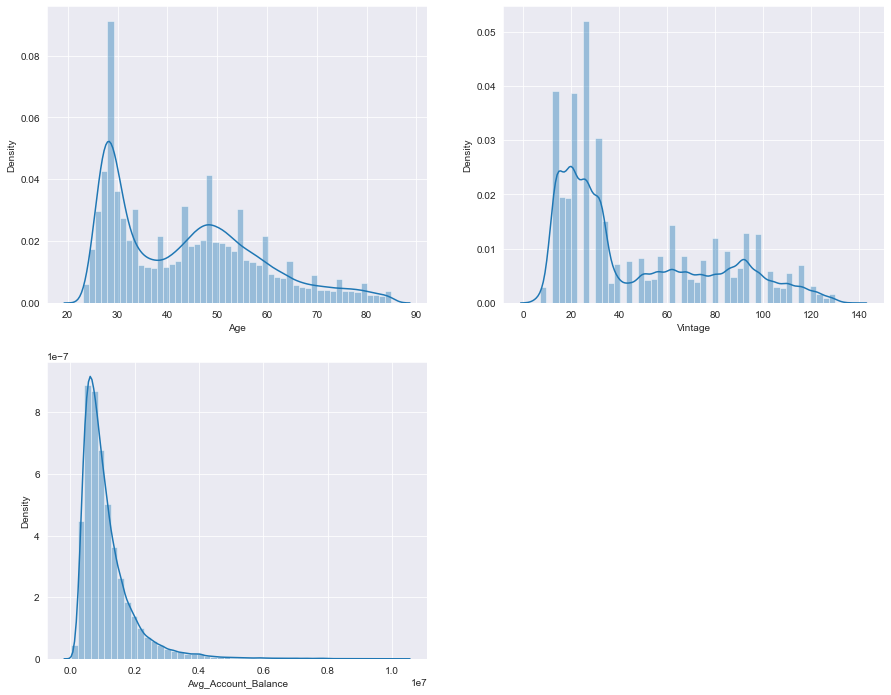

In [13]:
plt.figure(figsize=(15,12))
i=1
for col in num_cols:
    plt.subplot(2,2,i)
    sns.distplot(train[col])
    i+=1

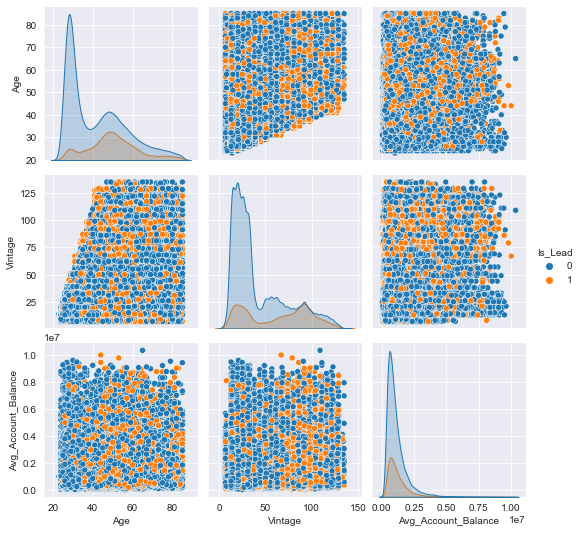

In [14]:
sns.pairplot(train, hue='Is_Lead')

**Insights:**
**The data is skewed**


<AxesSubplot:>

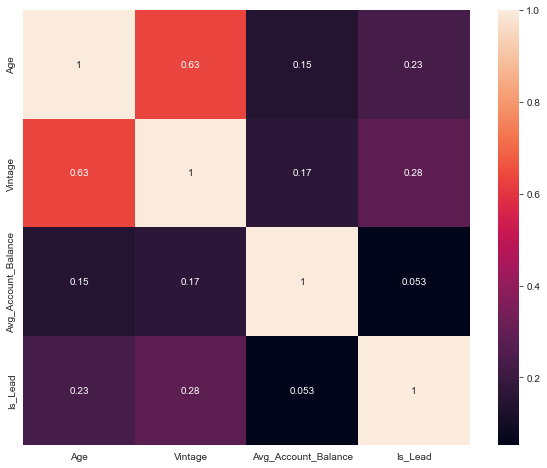

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(train.corr(), annot=True)

# Null Values

In [16]:
train['Credit_Product'].fillna('Yes', inplace=True)
test['Credit_Product'].fillna('Yes', inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Gender               245725 non-null  object
 1   Age                  245725 non-null  int64 
 2   Region_Code          245725 non-null  object
 3   Occupation           245725 non-null  object
 4   Channel_Code         245725 non-null  object
 5   Vintage              245725 non-null  int64 
 6   Credit_Product       245725 non-null  object
 7   Avg_Account_Balance  245725 non-null  int64 
 8   Is_Active            245725 non-null  object
 9   Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 18.7+ MB


In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Gender               105312 non-null  object
 1   Age                  105312 non-null  int64 
 2   Region_Code          105312 non-null  object
 3   Occupation           105312 non-null  object
 4   Channel_Code         105312 non-null  object
 5   Vintage              105312 non-null  int64 
 6   Credit_Product       105312 non-null  object
 7   Avg_Account_Balance  105312 non-null  int64 
 8   Is_Active            105312 non-null  object
dtypes: int64(3), object(6)
memory usage: 7.2+ MB


In [18]:
trans= [col for col in cat_cols if col!='Region_Code']
trans

['Gender', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active']

# Feature Engineeing

In [19]:
train_dum= pd.get_dummies(train[trans], drop_first=True)
train_dum.head()


,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Yes,Is_Active_Yes
0,0,1,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,1,0,0,1
3,1,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0


In [20]:
test_dum= pd.get_dummies(test[trans], drop_first=True)
test_dum.head()

,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Yes,Is_Active_Yes
0,1,1,0,0,0,0,0,1,0
1,1,1,0,0,1,0,0,1,0
2,1,0,1,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0


In [21]:
train.drop(trans, axis=1,inplace=True)
train.head()

,Age,Region_Code,Vintage,Avg_Account_Balance,Is_Lead
0,73,RG268,43,1045696,0
1,30,RG277,32,581988,0
2,56,RG268,26,1484315,0
3,34,RG270,19,470454,0
4,30,RG282,33,886787,0


In [22]:
train= pd.concat([train, train_dum], axis=1)
train.head()

,Age,Region_Code,Vintage,Avg_Account_Balance,Is_Lead,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Yes,Is_Active_Yes
0,73,RG268,43,1045696,0,0,1,0,0,0,1,0,0,0
1,30,RG277,32,581988,0,0,0,1,0,0,0,0,0,0
2,56,RG268,26,1484315,0,0,0,0,1,0,1,0,0,1
3,34,RG270,19,470454,0,1,0,1,0,0,0,0,0,0
4,30,RG282,33,886787,0,0,0,1,0,0,0,0,0,0


In [23]:
test.drop(trans, axis=1, inplace=True)
test= pd.concat([test, test_dum], axis=1)
test.head()

,Age,Region_Code,Vintage,Avg_Account_Balance,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Yes,Is_Active_Yes
0,29,RG254,25,742366,1,1,0,0,0,0,0,1,0
1,43,RG268,49,925537,1,1,0,0,1,0,0,1,0
2,31,RG270,14,215949,1,0,1,0,0,0,0,0,0
3,29,RG272,33,868070,1,1,0,0,0,0,0,0,0
4,29,RG270,19,657087,0,1,0,0,0,0,0,0,0


In [24]:
from sklearn.preprocessing import LabelEncoder

enc= LabelEncoder()
train['Region_Code']= enc.fit_transform(train['Region_Code'])
test['Region_Code']= enc.transform(test['Region_Code'])
train.head()

,Age,Region_Code,Vintage,Avg_Account_Balance,Is_Lead,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Yes,Is_Active_Yes
0,73,18,43,1045696,0,0,1,0,0,0,1,0,0,0
1,30,27,32,581988,0,0,0,1,0,0,0,0,0,0
2,56,18,26,1484315,0,0,0,0,1,0,1,0,0,1
3,34,20,19,470454,0,1,0,1,0,0,0,0,0,0
4,30,32,33,886787,0,0,0,1,0,0,0,0,0,0


In [25]:
test.head()

,Age,Region_Code,Vintage,Avg_Account_Balance,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Yes,Is_Active_Yes
0,29,4,25,742366,1,1,0,0,0,0,0,1,0
1,43,18,49,925537,1,1,0,0,1,0,0,1,0
2,31,20,14,215949,1,0,1,0,0,0,0,0,0
3,29,22,33,868070,1,1,0,0,0,0,0,0,0
4,29,20,19,657087,0,1,0,0,0,0,0,0,0


**We use log transformation because the data is skewed**

In [26]:
train['Avg_Account_Balance']= np.log(train['Avg_Account_Balance'])
train['Vintage']= np.log(train['Vintage'])
test['Avg_Account_Balance']= np.log(test['Avg_Account_Balance'])
test['Vintage']= np.log(test['Vintage'])

In [27]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()

train[['Vintage', 'Avg_Account_Balance', 'Age', 'Region_Code']]= ss.fit_transform(train[['Vintage', 'Avg_Account_Balance', 'Age', 'Region_Code']])
test[['Vintage', 'Avg_Account_Balance','Age', 'Region_Code']]= ss.transform(test[['Vintage', 'Avg_Account_Balance', 'Age', 'Region_Code']])
train.head()

,Age,Region_Code,Vintage,Avg_Account_Balance,Is_Lead,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Yes,Is_Active_Yes
0,1.965365,-0.172389,0.219548,0.204552,0,0,1,0,0,0,1,0,0,0
1,-0.934429,0.655830,-0.198676,-0.740962,0,0,0,1,0,0,0,0,0,0
2,0.818935,-0.172389,-0.492586,0.769727,0,0,0,0,1,0,1,0,0,1
3,-0.664680,0.011660,-0.936562,-1.084245,0,1,0,1,0,0,0,0,0,0
4,-0.934429,1.115951,-0.155119,-0.061413,0,0,0,1,0,0,0,0,0,0


In [28]:
test.head()

,Age,Region_Code,Vintage,Avg_Account_Balance,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Yes,Is_Active_Yes
0,-1.001866,-1.460729,-0.548102,-0.348239,1,1,0,0,0,0,0,1,0
1,-0.057747,-0.172389,0.404439,0.007597,1,1,0,0,1,0,0,1,0
2,-0.866992,0.011660,-1.368824,-2.340635,1,0,1,0,0,0,0,0,0
3,-1.001866,0.195708,-0.155119,-0.095833,1,1,0,0,0,0,0,0,0
4,-1.001866,0.011660,-0.936562,-0.545133,0,1,0,0,0,0,0,0,0


<AxesSubplot:xlabel='Avg_Account_Balance', ylabel='Density'>

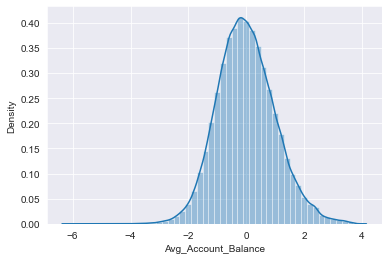

In [29]:
sns.distplot(train['Avg_Account_Balance'])

<AxesSubplot:xlabel='Avg_Account_Balance', ylabel='Density'>

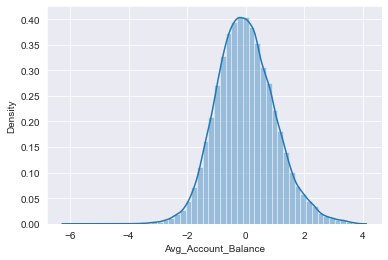

In [30]:
sns.distplot(test['Avg_Account_Balance'])

<AxesSubplot:xlabel='Vintage', ylabel='Density'>

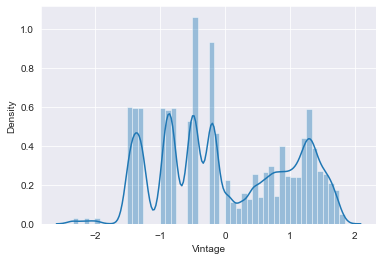

In [31]:
sns.distplot(train['Vintage'])

<AxesSubplot:xlabel='Vintage', ylabel='Density'>

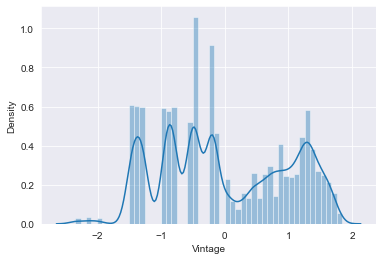

In [32]:
sns.distplot(test['Vintage'])

# Model Building

In [33]:
from sklearn.model_selection import train_test_split

X= train.drop('Is_Lead', axis=1)
y= train['Is_Lead']

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, stratify=y)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report

**For the sake of computational simplicity, I use Logistic Regression and RandomForest only. SVM and other classifiers took a lot of time to train, so I decided to go with this here**

In [35]:
lr = LogisticRegression()

lr.fit(X_train, y_train)
y_pred= lr.predict(X_test)

print(roc_auc_score(y_train, lr.predict(X_train)))
print(roc_auc_score(y_test, y_pred))

0.7059997595881735
0.7046036484275949


In [36]:
rfc= RandomForestClassifier()

rfc.fit(X_train, y_train)
y_pred= rfc.predict(X_test)

print(roc_auc_score(y_train, rfc.predict(X_train)))
print(roc_auc_score(y_test, y_pred))

0.9999356637357923
0.706308593566854


# Hyperparamter Tuning

In [37]:
from sklearn.model_selection import RandomizedSearchCV

params= {'C':[0.001, 0.01, 0.1, 1],
        'max_iter':[100,200,500]}

random_lr= RandomizedSearchCV(lr, param_distributions= params, cv=5, scoring='roc_auc', random_state=42)


In [38]:
random_lr.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1],
                                        'max_iter': [100, 200, 500]},
                   random_state=42, scoring='roc_auc')

In [39]:
best_lr= random_lr.best_estimator_

best_lr.fit(X_train, y_train)
y_pred= best_lr.predict(X_test)

print(roc_auc_score(y_train, best_lr.predict(X_train)))
print(roc_auc_score(y_test, y_pred))

0.7033504441433298
0.7016189927713855


In [40]:
# params= {'n_estimators':[50,100,200,500],
#         'max_depth':[10, 100, 500],
#         'min_weight_fraction_leaf':[0, 0.1, 0.01, 0.2]}

# random_rfc= RandomizedSearchCV(rfc, param_distributions= params, cv=5, random_state=42, scoring='roc_auc')

In [41]:
# random_rfc.fit(X_train,y_train)

In [42]:
# random_rfc.best_estimator_
#RandomForestClassifier(max_depth=100, min_weight_fraction_leaf=0.01,
#                        n_estimators=500)

In [43]:
best_rfc= RandomForestClassifier(max_depth=100, min_weight_fraction_leaf=0.01,n_estimators=500)

best_rfc.fit(X_train, y_train)
y_pred= best_rfc.predict(X_test)

print(roc_auc_score(y_train, best_rfc.predict(X_train)))
print(roc_auc_score(y_test, y_pred))

0.7005173909925083
0.6988540758977952


# ROC Curve

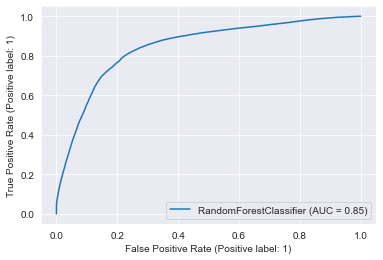

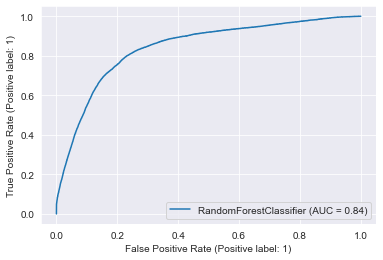

In [44]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(best_rfc, X_train, y_train)
plot_roc_curve(best_rfc, X_test, y_test)

In [45]:
predictions= best_rfc.predict(test)

In [46]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [47]:
test_data= pd.read_csv(r'C:\Users\Admin\Desktop\Projects_\Credit Card Lead Prediction\test_mSzZ8RL.csv')

sub= pd.DataFrame(test_data['ID'])
sub.head()

,ID
0,VBENBARO
1,CCMEWNKY
2,VK3KGA9M
3,TT8RPZVC
4,SHQZEYTZ


# Final Predictions on Test Set

In [48]:
sub['Is_Lead']= predictions
sub.tail()

,ID,Is_Lead
105307,DBENJOYI,1
105308,CWQ72DWS,1
105309,HDESC8GU,0
105310,2PW4SFCA,0
105311,F2NOYPPZ,0


In [49]:
sub.to_csv('submission.csv', index=False)